In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [17]:
RISK_FREE_RATE = 0.05
MONTHS_IN_YEAR = 12

In [20]:
class CAPM:
    def __init__(self, stocks, start_date, end_date):
        self.data = None
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date
    
    def download_data(self):
        data = {}

        for stock in self.stocks:
            ticker = yf.download(stock, self.start_date, self.end_date)
            data[stock] = ticker["Adj Close"]
        
        return pd.DataFrame(data)
    
    def initialize(self):
        stock_data = self.download_data()
        stock_data = stock_data.resample("M").last()
        
        self.data = pd.DataFrame({"s_adjclose" : stock_data[self.stocks[0]], "m_adjclose" : stock_data[self.stocks[1]]})
        
        self.data[["s_returns", "m_returns"]] = np.log(self.data[["s_adjclose", "m_adjclose"]] / self.data[["s_adjclose", "m_adjclose"]].shift(1))
        self.data = self.data[1:]
    
    def calculate_beta(self):
        covariance_matrix = np.cov(self.data["s_returns"], self.data["m_returns"])

        beta = covariance_matrix[0, 1] / covariance_matrix[1, 1]
        print("Beta from formula: %.2f" % beta)
    
    def plot_regression(self, alpha, beta):
        fig, axis = plt.subplots(1, figsize=(20, 10))
        axis.scatter(self.data["m_returns"], self.data["s_returns"], label="Data Points")
        axis.plot(self.data["m_returns"], beta*self.data["m_returns"] + alpha, color="red", label="CAPM line")
        plt.title("CAPM, finding alpha and beta")
        plt.xlabel("Market return $R_m$", fontsize=18)
        plt.ylabel("Stock return $R_a$")
        plt.text(0.08, 0.05, r'$R_a = \beta * R_m + \alpha$', fontsize=18)
        plt.legend()
        plt.grid(True)
        plt.show()
    
    def regression(self):
        beta, alpha = np.polyfit(self.data["m_returns"], self.data["s_returns"], deg=1)
        print("Beta from regression: %.2f" % beta)
        expected_return = RISK_FREE_RATE + beta * (self.data["m_returns"].mean()*MONTHS_IN_YEAR - RISK_FREE_RATE)
        print("Expected return: %.2f" % expected_return)
        self.plot_regression(alpha, beta)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Beta from formula: 1.27
Beta from regression: 1.27
Expected return: 0.18


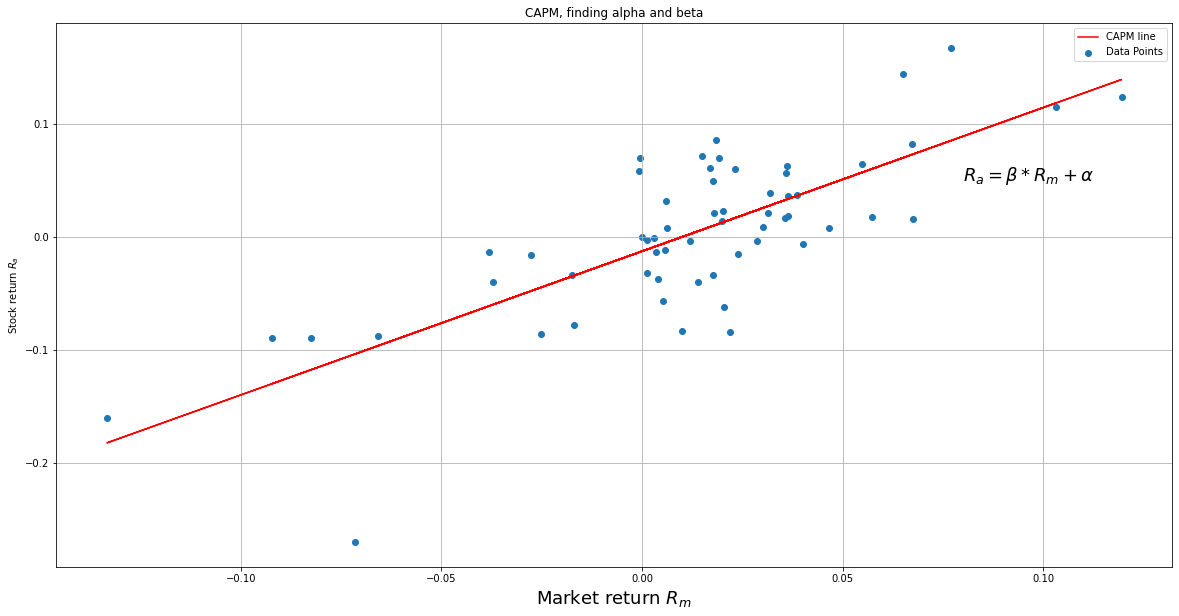

In [21]:
if __name__ == "__main__":
    capm = CAPM(["IBM", "SPY"], "2016-01-01", "2021-01-01")
    capm.initialize()
    capm.calculate_beta()
    capm.regression()